# Traffic Jam Problem

In [185]:
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

# Problem

This challenge asks you to **build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time.** There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.

The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

All of these points are mapped here.

Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.



# Data Cleaning

## Making Useable Data Frame

In [186]:
train = pd.read_csv("train_revised.csv")
train.head()
# The data does not have explicit information on the number of seats sold for each ride

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [187]:
# Dropping travel_from == Kendu Bay and Keumbu to match test data
train = train[train.travel_from != 'Kendu Bay'] 
train = train[train.travel_from != 'Keumbu']

In [188]:
train.shape

(51622, 10)

In [189]:
# Each row is one ticket and ride_id is one individual ride
len(train['ride_id'].unique())

6228

In [190]:
train.query("ride_id == 5777")
# The attributes for each ride_id is the same (except for seat_number and payment_receipt)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
5,5777,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
6,5777,14A,Mpesa,MZHGDGS6QZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
60,5777,15B,Mpesa,7C7P3D5AJQ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
62,5777,16B,Mpesa,P013NWHQID,27-11-17,7:10,Homa Bay,Nairobi,Bus,49


In [191]:
train['number_of_seats'] = np.linspace(1,1,51622)
train.head()
# Adding col for each seat sold

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,1.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,1.0


In [192]:
# Number of tickets sold per ride
nos_data = train.groupby('ride_id').sum()[['number_of_seats']]
nos_data.head()

,number_of_seats
ride_id,
1442,1.0
5437,1.0
5710,1.0
5777,5.0
5778,31.0


In [193]:
# Dropping duplicate ride_id rows (row count is the same as nos_data)
train_drop_dup = train.drop_duplicates(subset='ride_id', keep='first')
train_drop_dup.shape

(6228, 11)

In [194]:
train_proc = pd.merge(train_drop_dup, nos_data, on = 'ride_id')
train_proc = train_proc.drop('seat_number', axis = 1) # dropped to avoid identifying variables
train_proc = train_proc.drop('payment_receipt', axis = 1).set_index('ride_id') # ^
train_proc = train_proc.drop('number_of_seats_x', axis = 1)
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y
ride_id,,,,,,,,
1442,Mpesa,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
5437,Mpesa,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
5710,Mpesa,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
5777,Mpesa,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
5778,Mpesa,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


In [195]:
train_proc.shape
# The same number of rows

(6228, 8)

## Transforming Data (EDA)

I am only transforming this set for exploratory analysis right now

In [196]:
from datetime import datetime, date

In [197]:
 date_form = pd.to_datetime(train_proc.travel_date, infer_datetime_format=True)

In [198]:
# Spliting up travel date
train_proc['travel_date'] = date_form
train_proc['month'] = train_proc['travel_date'].dt.month
train_proc['year'] = train_proc['travel_date'].dt.year
train_proc['day'] = train_proc['travel_date'].dt.day
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day
ride_id,,,,,,,,,,,
1442,Mpesa,2017-10-17,7:15,Migori,Nairobi,Bus,49,1.0,10,2017,17
5437,Mpesa,2017-11-19,7:12,Migori,Nairobi,Bus,49,1.0,11,2017,19
5710,Mpesa,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1.0,11,2017,26
5777,Mpesa,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27
5778,Mpesa,2017-11-27,7:12,Migori,Nairobi,Bus,49,31.0,11,2017,27


In [199]:
# Formatting travel_time
train_proc['td_minutes'] = pd.to_datetime(train_proc.travel_time, infer_datetime_format=True).dt.minute
train_proc['td_hour'] = pd.to_datetime(train_proc.travel_time, infer_datetime_format=True).dt.hour
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day,td_minutes,td_hour
ride_id,,,,,,,,,,,,,
1442,Mpesa,2017-10-17,7:15,Migori,Nairobi,Bus,49,1.0,10,2017,17,15,7
5437,Mpesa,2017-11-19,7:12,Migori,Nairobi,Bus,49,1.0,11,2017,19,12,7
5710,Mpesa,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1.0,11,2017,26,5,7
5777,Mpesa,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27,10,7
5778,Mpesa,2017-11-27,7:12,Migori,Nairobi,Bus,49,31.0,11,2017,27,12,7


In [200]:
train_proc['td_hour'] = train_proc['td_hour'] 
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day,td_minutes,td_hour
ride_id,,,,,,,,,,,,,
1442,Mpesa,2017-10-17,7:15,Migori,Nairobi,Bus,49,1.0,10,2017,17,15,7
5437,Mpesa,2017-11-19,7:12,Migori,Nairobi,Bus,49,1.0,11,2017,19,12,7
5710,Mpesa,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1.0,11,2017,26,5,7
5777,Mpesa,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27,10,7
5778,Mpesa,2017-11-27,7:12,Migori,Nairobi,Bus,49,31.0,11,2017,27,12,7


In [201]:
def convert_to_cate_hour(hour):
    if hour < 6:
        return "overnight"
    elif hour >= 6 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 18:
        return 'evening'
    else:
        return 'night'
# I wanted to make hour (24-hour time) into a categorical variable, but this didn't help our results much. 

In [202]:
#train_proc['time_of_day'] = train_proc['td_hour'].apply(convert_to_cate_hour)
#train_proc.head()

In [203]:
def convert_minutes(minutes):
    if minutes < 30:
        return "half before"
    else:
        return "half after"
# I also wanted to make minutes into a categorical variable (look at the scatter plot for minutes to see why)
# but this didn't help our results much either

In [204]:
#train_proc['minutes'] = train_proc['td_minutes'].apply(convert_minutes)
#train_proc.head()

In [205]:
# data set for EDA, need further processing for analysis
train_eda = train_proc.drop('travel_time', axis = 1)
train_eda.head()

,payment_method,travel_date,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day,td_minutes,td_hour
ride_id,,,,,,,,,,,,
1442,Mpesa,2017-10-17,Migori,Nairobi,Bus,49,1.0,10,2017,17,15,7
5437,Mpesa,2017-11-19,Migori,Nairobi,Bus,49,1.0,11,2017,19,12,7
5710,Mpesa,2017-11-26,Keroka,Nairobi,Bus,49,1.0,11,2017,26,5,7
5777,Mpesa,2017-11-27,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27,10,7
5778,Mpesa,2017-11-27,Migori,Nairobi,Bus,49,31.0,11,2017,27,12,7


In [18]:
train_eda.to_csv("train_eda")

# EDA

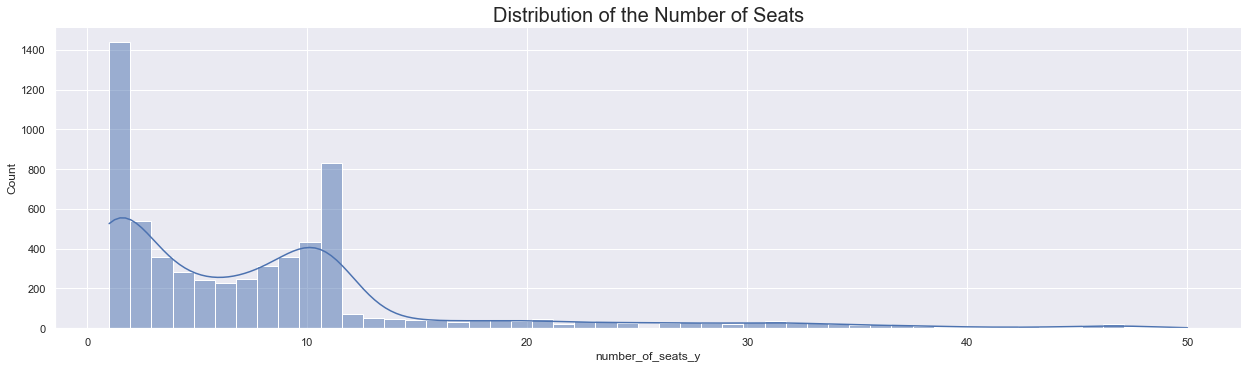

In [19]:
sns.displot(train_eda, x='number_of_seats_y', kde = True, aspect = 3.5)
plt.title("Distribution of the Number of Seats", size = 20);

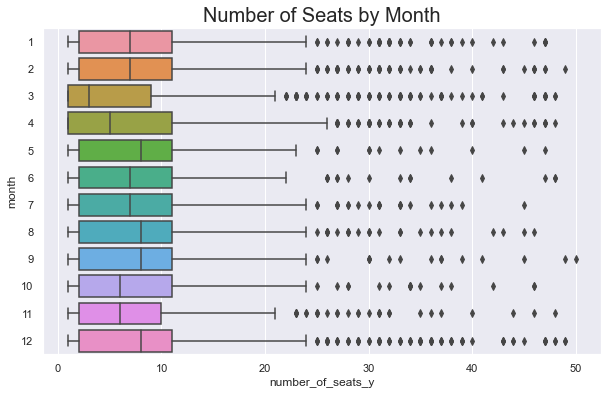

In [20]:
sns.boxplot(data = train_eda, y = 'month', x = 'number_of_seats_y', orient = 'h')
plt.title("Number of Seats by Month", size = 20);
# Would like to reorder how the boxes are shown

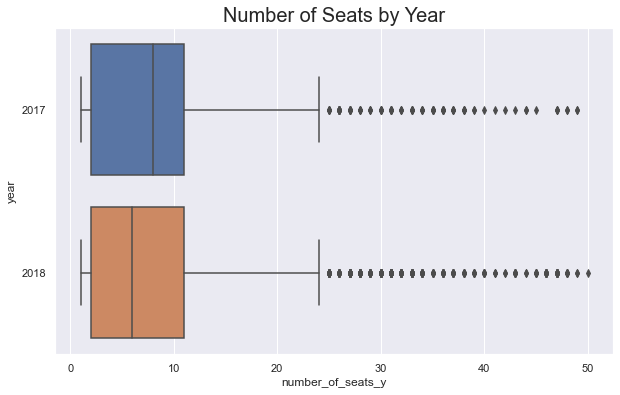

In [21]:
sns.boxplot(data = train_eda, y = 'year', x = 'number_of_seats_y', orient = 'h')
plt.title("Number of Seats by Year", size = 20);

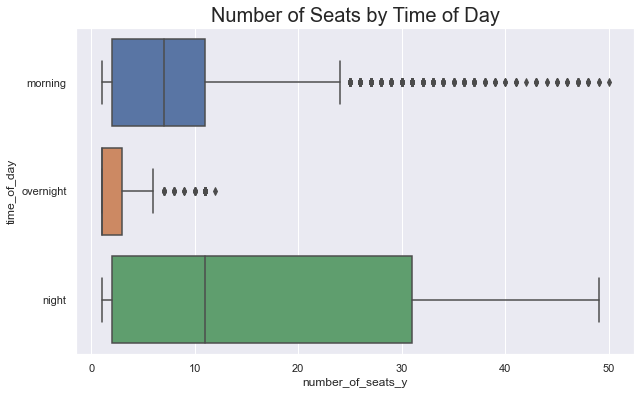

In [91]:
#sns.boxplot(data = copy_df, y = 'time_of_day', x = 'number_of_seats_y')
#plt.title("Number of Seats by Time of Day", size = 20);

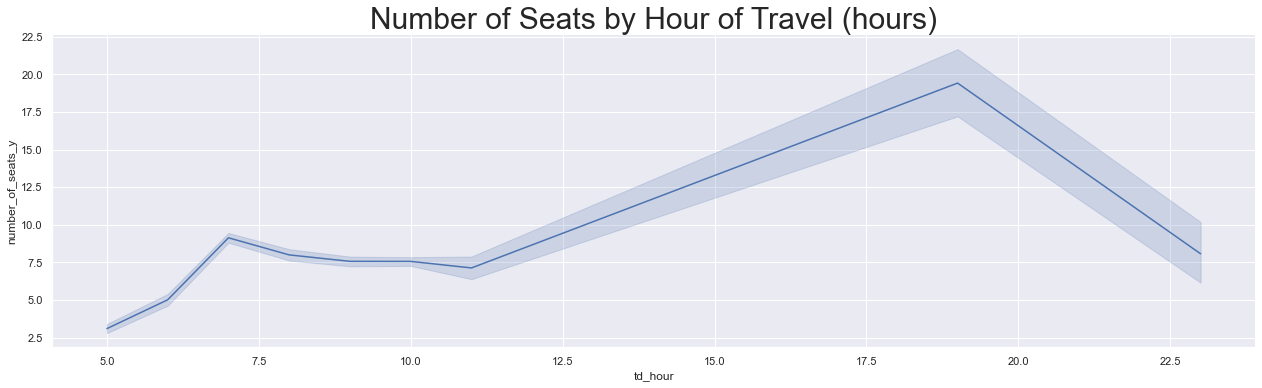

In [92]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'td_hour', kind = 'line', aspect = 3.5)
plt.title("Number of Seats by Hour of Travel (hours)", size = 30);
#Maybe good to make time into categorical ranges and do a boxplot 

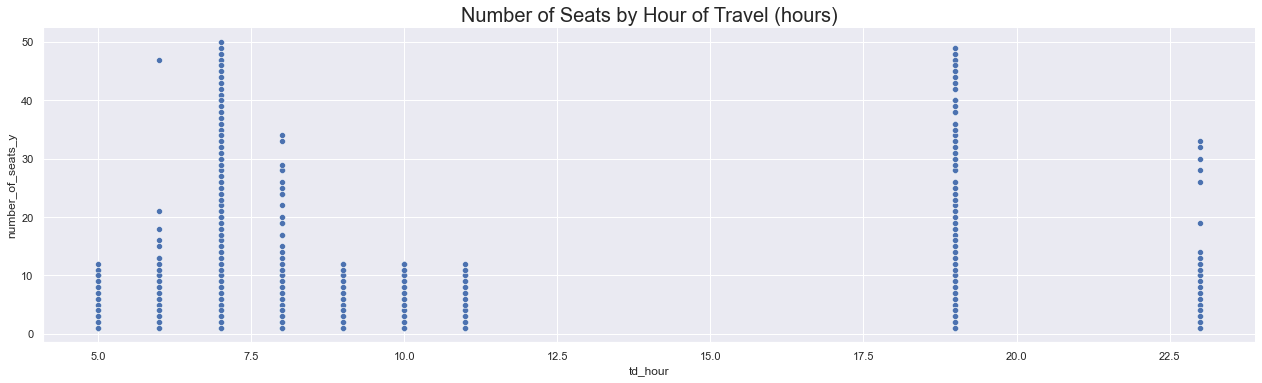

In [23]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'td_hour', kind = 'scatter', aspect = 3.5)
plt.title("Number of Seats by Hour of Travel (hours)", size = 20);
#Maybe good to make time into categorical ranges and do a boxplot 

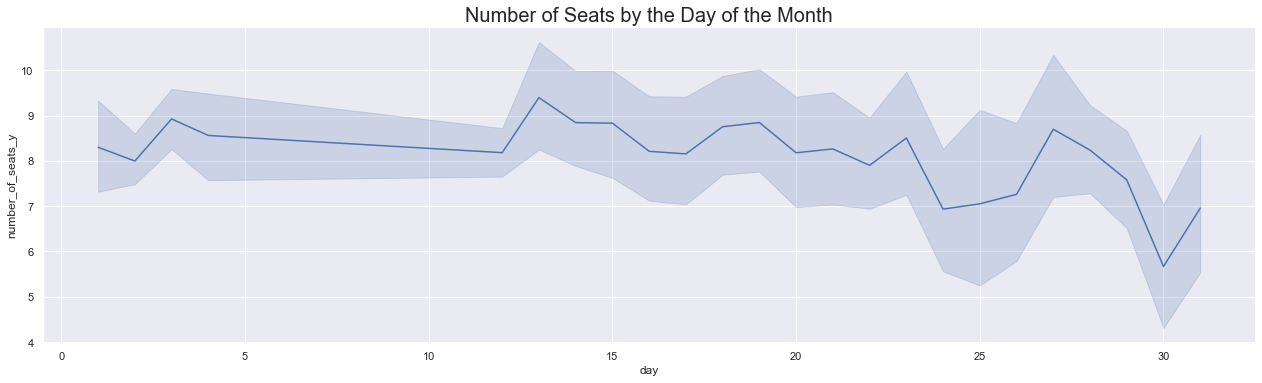

In [24]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'day', kind = 'line', aspect = 3.5)
plt.title("Number of Seats by the Day of the Month", size = 20);

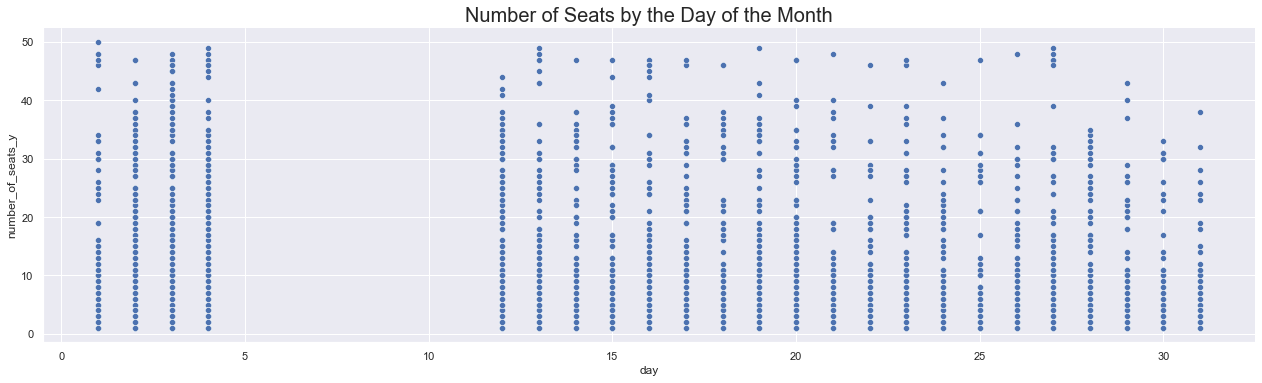

In [25]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'day', kind = 'scatter', aspect = 3.5)
plt.title("Number of Seats by the Day of the Month", size = 20);
#Interesting that there's no data for days 4 to 12

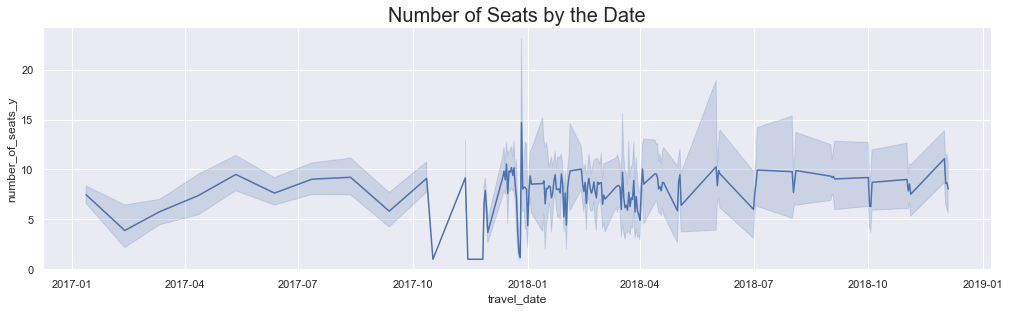

In [26]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'travel_date', kind = 'line', height=4, aspect=3.5)
plt.title("Number of Seats by the Date", size = 20);

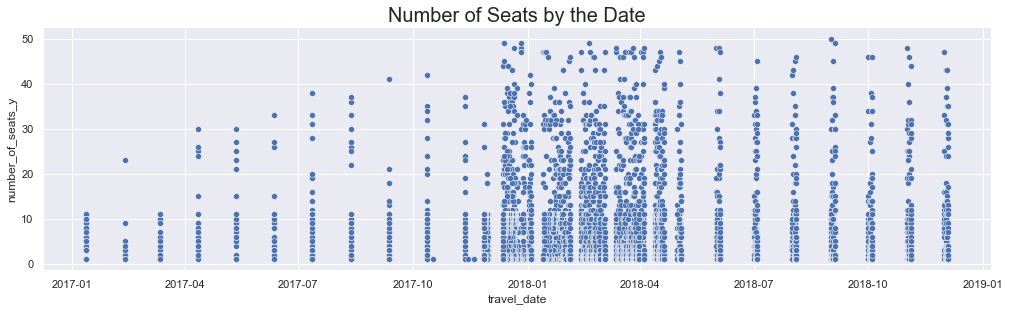

In [27]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'travel_date', kind = 'scatter', height=4, aspect=3.5)
plt.title("Number of Seats by the Date", size = 20);

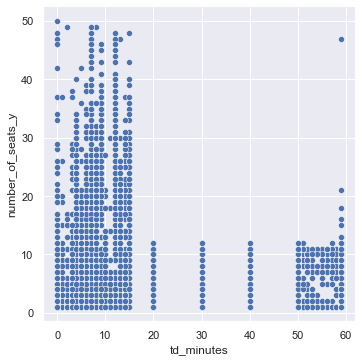

In [126]:
sns.relplot(data = copy_df, x = 'td_minutes', y = 'number_of_seats_y')
plt.title("Number of Seats vs. Minutes out of the Hour");

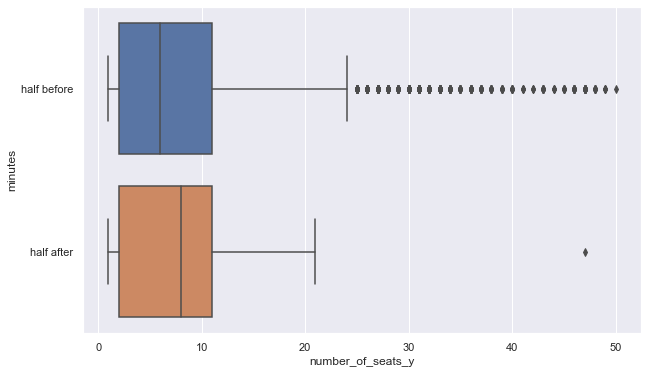

In [161]:
#sns.boxplot(data = train_proc, y = 'minutes', x = 'number_of_seats_y');

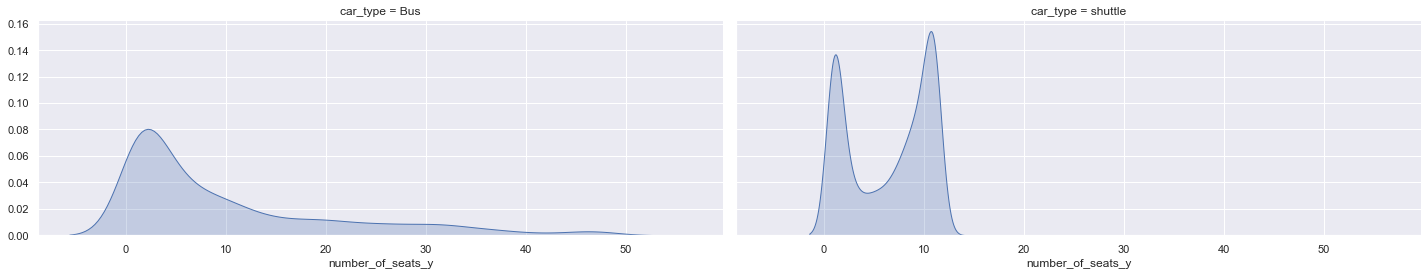

In [28]:
fg = sns.FacetGrid(data = train_eda, col = 'car_type', size=4, aspect=2.5,)
fg.map(sns.kdeplot, "number_of_seats_y", shade=True);

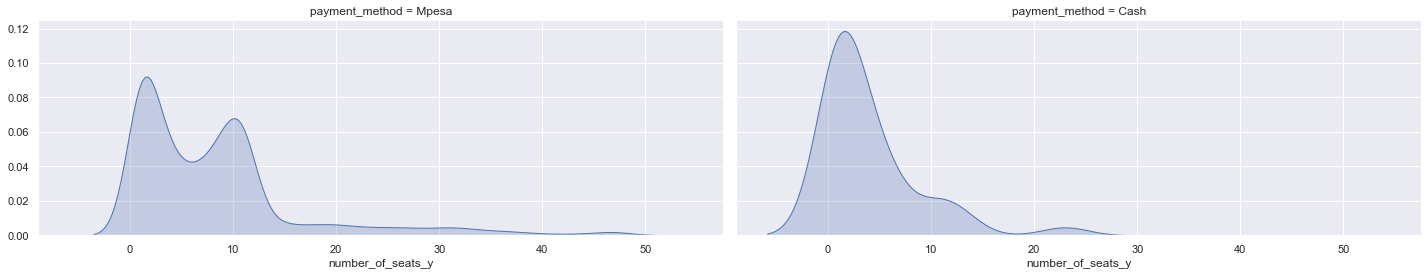

In [29]:
fg = sns.FacetGrid(data = train_eda, col = 'payment_method', size=4, aspect=2.5,)
fg.map(sns.kdeplot, "number_of_seats_y", shade=True);

In [30]:
train_eda.groupby('travel_from')[['number_of_seats_y']].agg(['min', 'mean', 'median', 'max'])

number_of_seats_y                        
                          min       mean median   max
travel_from                                          
Awendo                    1.0   9.664865    6.0  36.0
Homa Bay                  1.0  17.707865   18.5  46.0
Kehancha                  1.0  11.098837   11.0  30.0
Keroka                    1.0   3.166667    1.0  12.0
Kijauri                   1.0   1.854317    1.0  11.0
Kisii                     1.0   7.485762    8.0  49.0
Mbita                     2.0  18.000000   13.0  37.0
Migori                    1.0  18.204663   17.0  49.0
Ndhiwa                    1.0  10.727273   11.0  13.0
Nyachenge                 1.0   2.612245    2.0  11.0
Oyugis                    1.0   2.500000    2.5   4.0
Rodi                      1.0   7.941176    8.0  14.0
Rongo                     1.0   5.322493    3.0  37.0
Sirare                    1.0  23.293194   21.0  50.0
Sori                      1.0   2.750000    2.0  10.0

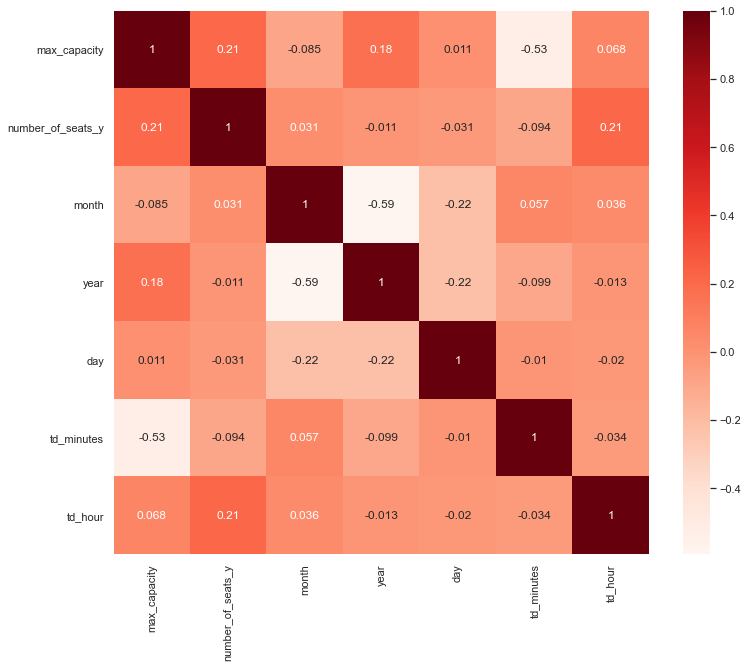

In [31]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_eda.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Transforming Data (ML)

Trying to separate target and feature columns before transforming

In [206]:
train_ml = train_eda.drop('travel_date', axis = 1).drop('year', axis = 1).drop('travel_to', axis = 1).drop('payment_method', axis = 1)
train_ml.head()
# dropped the columns to match the test set. I also wanted to make month categorical, but there are more months in the training set than the test set so I couldn't get it to work

,travel_from,car_type,max_capacity,number_of_seats_y,month,day,td_minutes,td_hour
ride_id,,,,,,,,
1442,Migori,Bus,49,1.0,10,17,15,7
5437,Migori,Bus,49,1.0,11,19,12,7
5710,Keroka,Bus,49,1.0,11,26,5,7
5777,Homa Bay,Bus,49,5.0,11,27,10,7
5778,Migori,Bus,49,31.0,11,27,12,7


In [207]:
#train_ml['month'] = pd.Categorical(train_ml['month'])
train_ml['max_capacity'] = pd.Categorical(train_ml['max_capacity'])

In [208]:
train_ml = pd.get_dummies(train_ml,prefix=['travel_from'], columns = ['travel_from'], drop_first=True)
train_ml = pd.get_dummies(train_ml,prefix=['car_type'], columns = ['car_type'], drop_first=True)
#train_ml = pd.get_dummies(train_ml,prefix=['payment_method'], columns = ['payment_method'], drop_first=True)
#train_ml = pd.get_dummies(train_ml,prefix=['month'], columns = ['month'], drop_first=True)
train_ml = pd.get_dummies(train_ml,prefix=['max_capacity'], columns = ['max_capacity'], drop_first=True)
#train_ml = pd.get_dummies(train_ml,prefix=['time_of_day'], columns = ['time_of_day'], drop_first=True)
#train_ml = pd.get_dummies(train_ml,prefix=['minutes'], columns = ['minutes'], drop_first=True)

In [209]:
train_ml.head()

,number_of_seats_y,month,day,td_minutes,td_hour,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,...,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle,max_capacity_49
ride_id,,,,,,,,,,,,,,,,,,,,,
1442,1.0,10,17,15,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5437,1.0,11,19,12,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5710,1.0,11,26,5,7,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5777,5.0,11,27,10,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5778,31.0,11,27,12,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# Training Data (All Relevant Variables | Try 1)

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [211]:
target = "number_of_seats_y"
feature_cols = train_ml.drop("number_of_seats_y", axis = 1).columns

In [212]:
feature_cols

Index(['month', 'day', 'td_minutes', 'td_hour', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'car_type_shuttle', 'max_capacity_49'],
      dtype='object')

In [213]:
X = train_ml[feature_cols]
y = train_ml[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [214]:
model = LinearRegression()
model.fit(X = X_train, y = y_train)

LinearRegression()

In [215]:
predictions = model.predict(X_test)
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 17.000 Estimated value: 18.20516
Real value: 2.000 Estimated value: 0.26866
Real value: 9.000 Estimated value: 7.39460
Real value: 8.000 Estimated value: 7.96627
Real value: 2.000 Estimated value: 4.56816


In [216]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,ride_id,month,day,td_minutes,td_hour,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,...,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle,max_capacity_49,target,prediction
0,9518,1,2,15,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,17.0,18.205162
1,9433,1,30,20,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,2.0,0.268660
2,10131,9,1,50,8,0,0,0,0,1,...,0,0,0,0,0,0,1,0,9.0,7.394603
3,6884,8,3,0,7,0,0,0,0,1,...,0,0,0,0,0,0,1,0,8.0,7.966274
4,9530,1,2,14,7,0,0,0,0,0,...,0,0,0,1,0,0,0,1,2.0,4.568159


In [217]:
X.shape

(1246, 23)

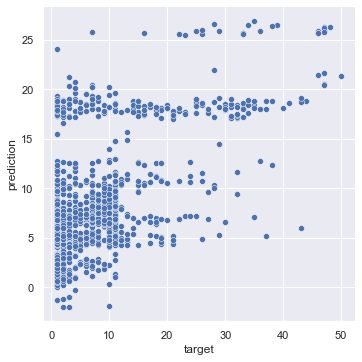

In [218]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter");

# Training Data (Try 2 | Cross-Validation)

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS

In [223]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [224]:
results_cross_validation = cross_val_score(
    estimator=model, 
    X=train_ml[feature_cols],
    y=train_ml[target],
    scoring="neg_mean_absolute_error", 
    cv=6,
)

In [225]:
results_cross_validation

array([-4.58768519, -4.3979834 , -4.44584532, -4.77195451, -5.06711349,
       -5.8281582 ])

In [226]:
def rmse_cross_val(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

In [227]:
from sklearn.model_selection import cross_validate

scoring_functions = {"mae": "neg_mean_absolute_error", "r_sqd": "r2", "mse": 'neg_mean_squared_error'}

scores = cross_validate(
    model,                # estimator
    X=train_ml[feature_cols],
    y=train_ml[target],          
    scoring=scoring_functions, # a single scorer or a dict with multiple scoring functions
    cv=20,                      # number of partitions
    return_train_score=True,
    return_estimator = True # return the training error, not only the test error
)

In [228]:
results = pd.DataFrame(scores)
results

,fit_time,score_time,estimator,test_mae,train_mae,test_r_sqd,train_r_sqd,test_mse,train_mse
0,0.008167,0.003710,LinearRegression(),-5.668031,-4.685948,-1.953519,0.384677,-41.459830,-46.835375
1,0.005712,0.002769,LinearRegression(),-3.995733,-4.771174,0.091924,0.382652,-29.184476,-47.415666
2,0.004335,0.003000,LinearRegression(),-4.124887,-4.763402,0.315565,0.379564,-36.896546,-46.955584
3,0.003402,0.002037,LinearRegression(),-3.927089,-4.781576,0.383859,0.377000,-34.903956,-47.060450
4,0.007619,0.001895,LinearRegression(),-3.946468,-4.780173,0.413862,0.375893,-32.946405,-47.158773
5,0.003439,0.001868,LinearRegression(),-4.972662,-4.733132,0.380884,0.376683,-54.876350,-46.025116
6,0.003833,0.001942,LinearRegression(),-4.707768,-4.738287,0.436905,0.372094,-50.754094,-46.289189
7,0.003532,0.001874,LinearRegression(),-4.685549,-4.744117,0.305487,0.380267,-44.476569,-46.565102
8,0.003634,0.001863,LinearRegression(),-4.297153,-4.768029,0.241905,0.381605,-36.670432,-46.972270
9,0.003823,0.001886,LinearRegression(),-4.246882,-4.773888,0.427620,0.374676,-36.586473,-46.971615


In [256]:
model2 = results.estimator[3]
model2
# This was the model used to test the test data

LinearRegression()

In [236]:
model2.intercept_

6.796383716990714

In [237]:
model2.predict(X_test)

array([17.58958723,  0.30406328,  7.31744398, ...,  6.87539632,
        2.03853965,  8.37763935])

In [238]:
y_test

ride_id
9518     17.0
9433      2.0
10131     9.0
6884      8.0
9530      2.0
         ... 
8952      1.0
5918      1.0
12154     7.0
7083      2.0
10858     5.0
Name: number_of_seats_y, Length: 1246, dtype: float64

# Test

In [239]:
test_csv = pd.read_csv("test_questions.csv", index_col = 'ride_id')
test_csv.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
ride_id,,,,,,
247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [240]:
 date_form_test = pd.to_datetime(test_csv.travel_date, infer_datetime_format=True)

In [241]:
# Spliting up travel date
test_csv['travel_date'] = date_form_test
test_csv['month'] = test_csv['travel_date'].dt.month
test_csv['year'] = test_csv['travel_date'].dt.year
test_csv['day'] = test_csv['travel_date'].dt.day
test_csv.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,month,year,day
ride_id,,,,,,,,,
247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,5,2018,7
256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,5,2018,6
275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,5,2018,4
285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,5,2018,4
286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,5,2018,4


In [242]:
# Formatting travel_time
test_csv['td_minutes'] = pd.to_datetime(test_csv.travel_time, infer_datetime_format=True).dt.minute
test_csv['td_hour'] = pd.to_datetime(test_csv.travel_time, infer_datetime_format=True).dt.hour
test_csv.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,month,year,day,td_minutes,td_hour
ride_id,,,,,,,,,,,
247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,5,2018,7,6,7
256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,5,2018,6,8,11
275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,5,2018,4,0,5
285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,5,2018,4,10,9
286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,5,2018,4,20,9


In [243]:
test_csv = test_csv.drop('travel_date', axis = 1).drop('travel_time', axis = 1).drop('travel_to', axis = 1).drop('year', axis = 1)
test_csv.head()

,travel_from,car_type,max_capacity,month,day,td_minutes,td_hour
ride_id,,,,,,,
247,Kisii,Bus,49,5,7,6,7
256,Kisii,shuttle,11,5,6,8,11
275,Kisii,shuttle,11,5,4,0,5
285,Kisii,shuttle,11,5,4,10,9
286,Kisii,shuttle,11,5,4,20,9


In [244]:
#test_csv['month'] = pd.Categorical(test_csv['month'])
test_csv['max_capacity'] = pd.Categorical(test_csv['max_capacity'])

In [245]:
test_csv.dtypes

travel_from       object
car_type          object
max_capacity    category
month              int64
day                int64
td_minutes         int64
td_hour            int64
dtype: object

In [246]:
test_csv = pd.get_dummies(test_csv,prefix=['travel_from'], columns = ['travel_from'], drop_first=True)
test_csv = pd.get_dummies(test_csv,prefix=['car_type'], columns = ['car_type'], drop_first=True)
#test_csv = pd.get_dummies(test_csv,prefix=['payment_method'], columns = ['payment_method'], drop_first=True)
#test_csv = pd.get_dummies(test_csv,prefix=['month'], columns = ['month'], drop_first=True)
test_csv = pd.get_dummies(test_csv,prefix=['max_capacity'], columns = ['max_capacity'], drop_first=True)

In [247]:
test_csv.head()

,month,day,td_minutes,td_hour,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle,max_capacity_49
ride_id,,,,,,,,,,,,,,,,,,,,
247,5,7,6,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
256,5,6,8,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
275,5,4,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
285,5,4,10,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
286,5,4,20,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [248]:
test_csv.shape

(1111, 20)

In [257]:
predictions_test = model2.predict(test_csv)

In [258]:
predictions_test

array([ 6.77562072,  9.37530573,  6.75328526, ...,  5.26271305,
        6.68645966, 18.63069235])

In [259]:
test = test_csv.copy()
test['number_of_ticket'] = np.round(predictions_test,0)
test.head()

,month,day,td_minutes,td_hour,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,...,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle,max_capacity_49,number_of_ticket
ride_id,,,,,,,,,,,,,,,,,,,,,
247,5,7,6,7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,7.0
256,5,6,8,11,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,9.0
275,5,4,0,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,7.0
285,5,4,10,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,8.0
286,5,4,20,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,8.0


In [260]:
test[['number_of_ticket']]

,number_of_ticket
ride_id,
247,7.0
256,9.0
275,7.0
285,8.0
286,8.0
...,...
15336,3.0
15337,11.0
15338,5.0


In [261]:
test[['number_of_ticket']].to_csv("resuts_1")